Basado en:
Data for Chains of Options
Dr. Yves J. Hilpisch | The Python Quants GmbH

In [93]:
import os
os.environ["LD_LIB_CONFIG_PATH"] = "../../Configuration"

In [94]:
import lseg.data as ld
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [95]:
ld.open_session()

<lseg.data.session.Definition object at 0x1b0bef98fd0 {name='workspace'}>

In [7]:
fields = ['PUTCALLIND', 'STRIKE_PRC', 'EXPIR_DATE', 'CF_CLOSE', 'IMP_VOLT']

In [8]:
'0#SPX*.U'
'0#SPXW*.U'
'0#GDAX*.EX'
'0#AAPL*.EX'

'0#AAPL*.EX'

In [122]:
SPX = ld.get_data('0#TSLA*.EX', fields=fields)

C:\Users\a_siq\AppData\Roaming\Python\Python311\site-packages\lseg\data\_tools\_dataframe.py:177: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [123]:
SPX

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
0,/TSLA.DE,<NA>,<NA>,NaT,224.55,<NA>
1,/TSLA0001aD5.EX,CALL,0.01,2025-04-17,207.34,<NA>
2,/TSLA0001aP5.EX,PUT,0.01,2025-04-17,<NA>,<NA>
3,/TSLA1220aD5.EX,<NA>,<NA>,NaT,<NA>,<NA>
4,/TSLA1220aP5.EX,<NA>,<NA>,NaT,<NA>,<NA>
...,...,...,...,...,...,...
716,/TSLA7200aX6.EX,PUT,720.0,2026-12-18,521.09,77.7761
717,/TSLA8000aL6.EX,CALL,800.0,2026-12-18,17.54,78.5441
718,/TSLA8000aX6.EX,PUT,800.0,2026-12-18,597.98,77.7567
719,/TSLA8800aL6.EX,CALL,880.0,2026-12-18,15.03,79.1757


In [124]:
SPX["EXPIR_DATE"].drop_duplicates()

0            NaT
1     2025-04-17
135   2025-05-16
251   2025-06-20
387   2025-09-19
467   2025-12-19
561   2026-03-20
621   2026-06-19
673   2026-12-18
Name: EXPIR_DATE, dtype: datetime64[ns]

In [125]:
SPXI = SPX['CF_CLOSE']

In [126]:
SPXI = SPX.iloc[0]['CF_CLOSE']

In [127]:
SPXI

224.55

In [128]:
puts = SPX[SPX['PUTCALLIND'].str.contains("PUT")]
puts = puts[SPX["EXPIR_DATE"]=="2025-06-20"]
calls = SPX[SPX['PUTCALLIND'].str.contains("CALL")]
calls = calls[SPX["EXPIR_DATE"]=="2025-06-20"]


C:\Users\a_siq\AppData\Local\Temp\ipykernel_30668\491073263.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\a_siq\AppData\Local\Temp\ipykernel_30668\491073263.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [129]:
puts

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
252,/TSLA0001aR5.EX,PUT,0.01,2025-06-20,<NA>,<NA>
254,/TSLA680aR5.EX,PUT,68.0,2025-06-20,0.4,120.0778
256,/TSLA720aR5.EX,PUT,72.0,2025-06-20,0.54,120.445
258,/TSLA760aR5.EX,PUT,76.0,2025-06-20,0.71,119.0328
260,/TSLA800aR5.EX,PUT,80.0,2025-06-20,0.89,117.948
...,...,...,...,...,...,...
378,/TSLA6000aR5.EX,PUT,600.0,2025-06-20,392.65,66.5925
380,/TSLA6400aR5.EX,PUT,640.0,2025-06-20,432.65,64.6082
382,/TSLA6800aR5.EX,PUT,680.0,2025-06-20,472.65,66.4316
384,/TSLA7200aR5.EX,PUT,720.0,2025-06-20,512.65,65.5399


In [130]:
calls

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
251,/TSLA0001aF5.EX,CALL,0.01,2025-06-20,207.34,<NA>
253,/TSLA680aF5.EX,CALL,68.0,2025-06-20,140.03,118.3075
255,/TSLA720aF5.EX,CALL,72.0,2025-06-20,136.2,119.7938
257,/TSLA760aF5.EX,CALL,76.0,2025-06-20,132.38,118.1765
259,/TSLA800aF5.EX,CALL,80.0,2025-06-20,128.59,117.4035
...,...,...,...,...,...,...
377,/TSLA6000aF5.EX,CALL,600.0,2025-06-20,0.39,98.609
379,/TSLA6400aF5.EX,CALL,640.0,2025-06-20,0.25,99.4488
381,/TSLA6800aF5.EX,CALL,680.0,2025-06-20,0.17,98.9518
383,/TSLA7200aF5.EX,CALL,720.0,2025-06-20,0.11,99.4517


In [131]:
limit = 30

In [132]:
puts_n = puts[abs(puts['STRIKE_PRC'] - SPXI) < limit].dropna()
calls_n = calls[abs(calls['STRIKE_PRC'] - SPXI) < limit].dropna()

In [133]:
puts

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
252,/TSLA0001aR5.EX,PUT,0.01,2025-06-20,<NA>,<NA>
254,/TSLA680aR5.EX,PUT,68.0,2025-06-20,0.4,120.0778
256,/TSLA720aR5.EX,PUT,72.0,2025-06-20,0.54,120.445
258,/TSLA760aR5.EX,PUT,76.0,2025-06-20,0.71,119.0328
260,/TSLA800aR5.EX,PUT,80.0,2025-06-20,0.89,117.948
...,...,...,...,...,...,...
378,/TSLA6000aR5.EX,PUT,600.0,2025-06-20,392.65,66.5925
380,/TSLA6400aR5.EX,PUT,640.0,2025-06-20,432.65,64.6082
382,/TSLA6800aR5.EX,PUT,680.0,2025-06-20,472.65,66.4316
384,/TSLA7200aR5.EX,PUT,720.0,2025-06-20,512.65,65.5399


In [134]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 251 to 385
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Instrument  68 non-null     string        
 1   PUTCALLIND  68 non-null     string        
 2   STRIKE_PRC  68 non-null     Float64       
 3   EXPIR_DATE  68 non-null     datetime64[ns]
 4   CF_CLOSE    68 non-null     Float64       
 5   IMP_VOLT    67 non-null     Float64       
dtypes: Float64(3), datetime64[ns](1), string(2)
memory usage: 3.9 KB


In [135]:
calls

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
251,/TSLA0001aF5.EX,CALL,0.01,2025-06-20,207.34,<NA>
253,/TSLA680aF5.EX,CALL,68.0,2025-06-20,140.03,118.3075
255,/TSLA720aF5.EX,CALL,72.0,2025-06-20,136.2,119.7938
257,/TSLA760aF5.EX,CALL,76.0,2025-06-20,132.38,118.1765
259,/TSLA800aF5.EX,CALL,80.0,2025-06-20,128.59,117.4035
...,...,...,...,...,...,...
377,/TSLA6000aF5.EX,CALL,600.0,2025-06-20,0.39,98.609
379,/TSLA6400aF5.EX,CALL,640.0,2025-06-20,0.25,99.4488
381,/TSLA6800aF5.EX,CALL,680.0,2025-06-20,0.17,98.9518
383,/TSLA7200aF5.EX,CALL,720.0,2025-06-20,0.11,99.4517


In [136]:
import matplotlib.pyplot as plt 


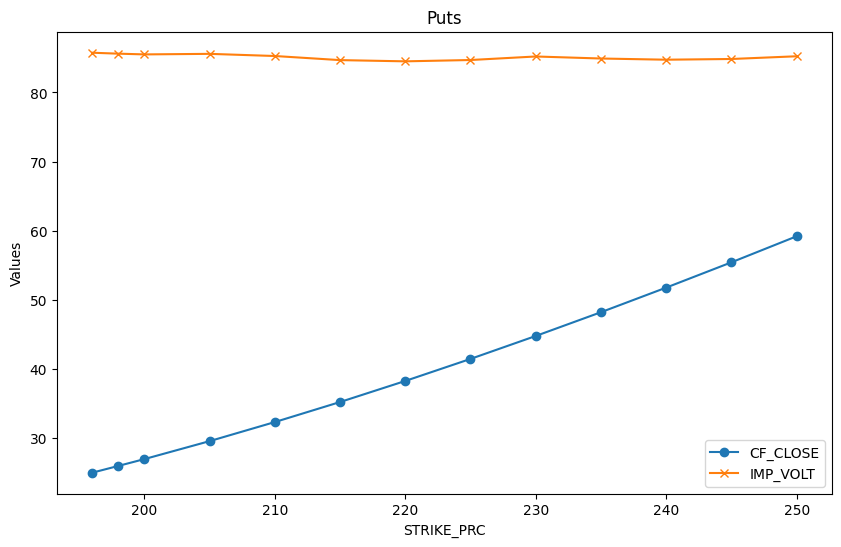

In [137]:
puts_n.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']]

plt.figure(figsize=(10, 6))
puts_n.set_index('STRIKE_PRC')['CF_CLOSE'].plot(label='CF_CLOSE', marker='o')
puts_n.set_index('STRIKE_PRC')['IMP_VOLT'].plot(label='IMP_VOLT', marker='x')

# Adding titles and labels
plt.title('Puts')
plt.xlabel('STRIKE_PRC')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

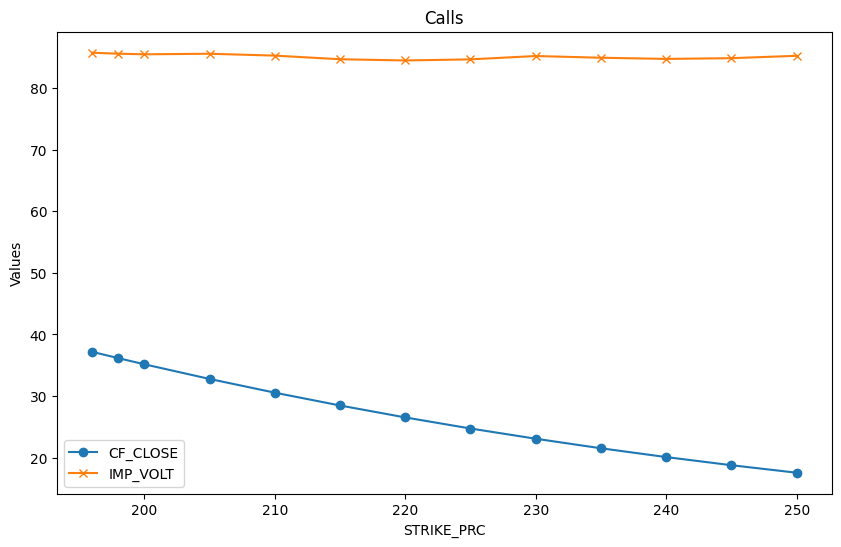

In [138]:
calls_n.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']]

plt.figure(figsize=(10, 6))
calls_n.set_index('STRIKE_PRC')['CF_CLOSE'].plot(label='CF_CLOSE', marker='o')
calls_n.set_index('STRIKE_PRC')['IMP_VOLT'].plot(label='IMP_VOLT', marker='x')

# Adding titles and labels
plt.title('Calls')
plt.xlabel('STRIKE_PRC')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [258]:
import matplotlib.pyplot as plt 

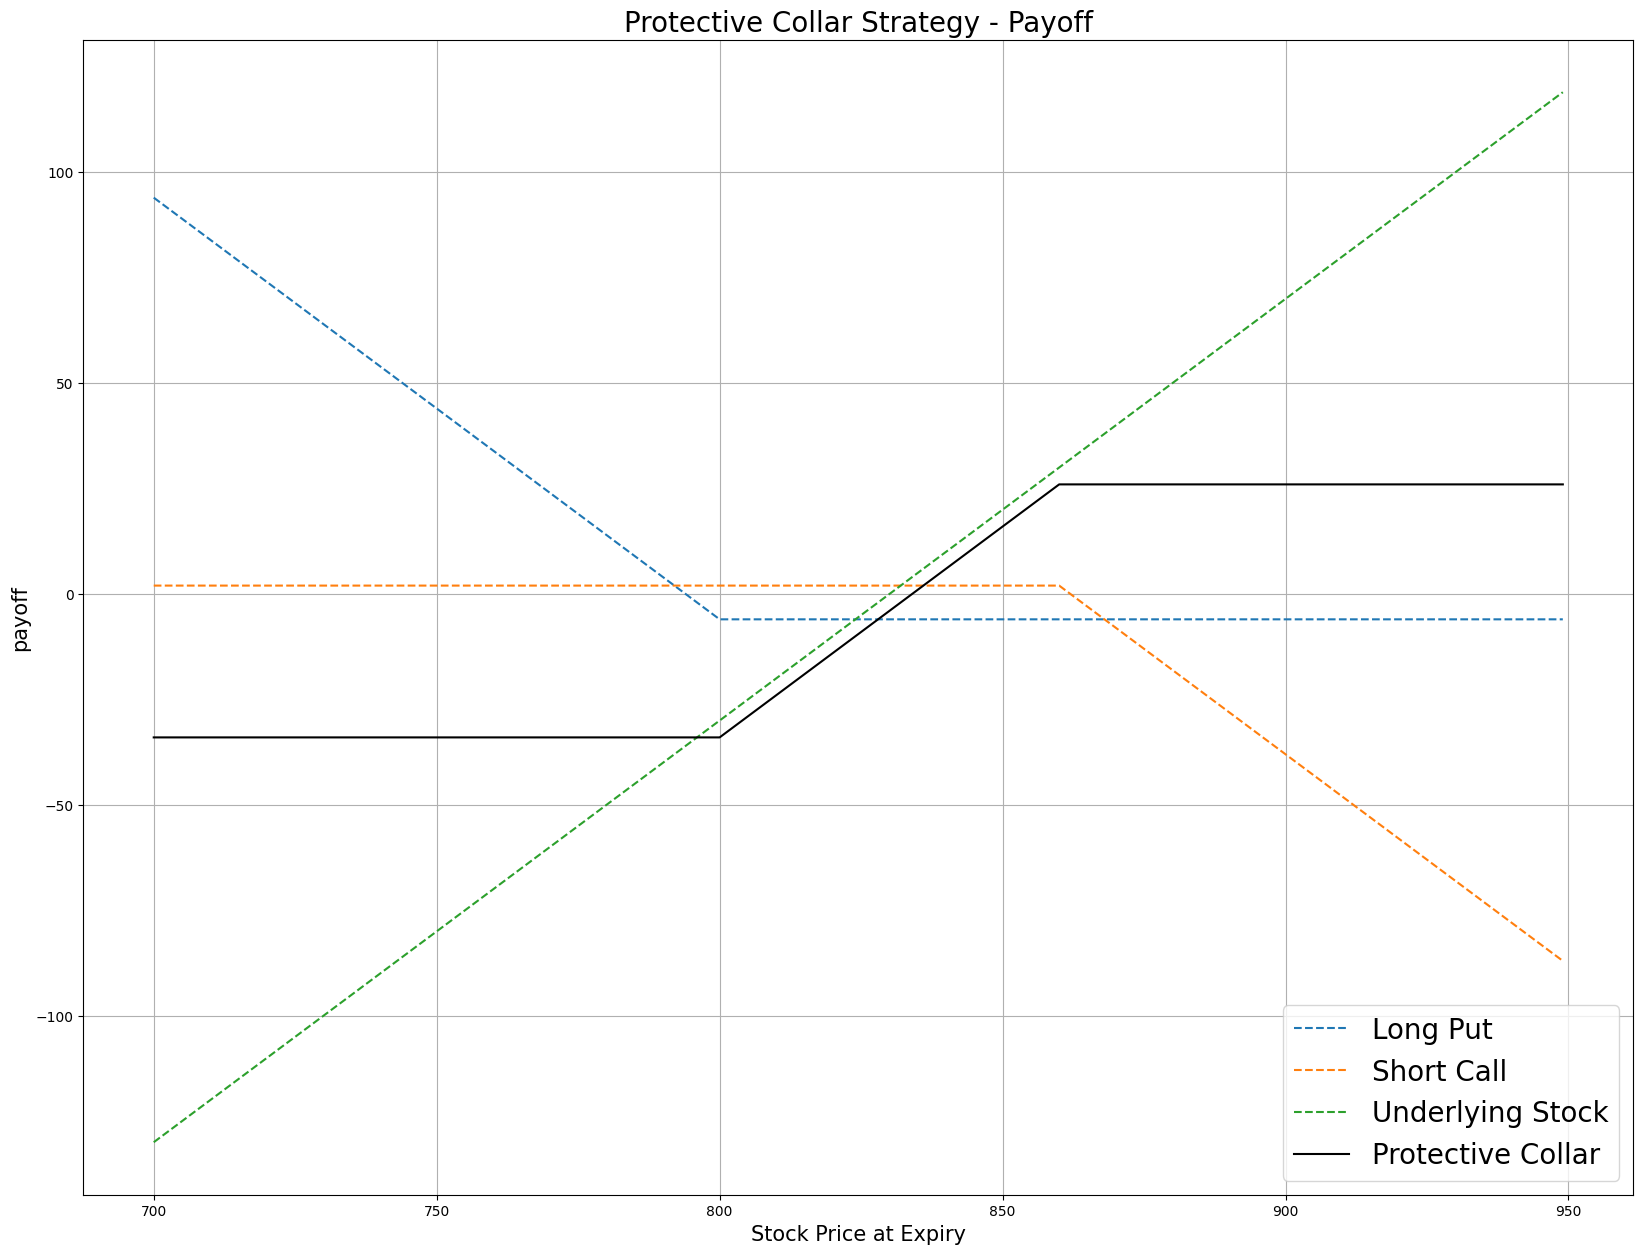

In [92]:
# https://www.quantconnect.com/learning/articles/applied-options/protective-collar
# Protective Collar
price = np.arange(700,950,1)
# assume at time 0, the price of the undelying stock is 830
k_otm_put = 800 # the strike price of OTM put
k_otm_call = 860 # the strike price of OTM call
premium_otm_put = 6 # the premium of OTM put
premium_otm_call = 2 # the premium of OTM call
# payoff for the long put position
payoff_long_put = [max(-premium_otm_put, k_otm_put-i-premium_otm_put) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_otm_call, -(i-k_otm_call-premium_otm_call)) for i in price]
# payoff for the underlying stock
payoff_stock = price - 830
# payoff for the Protective Collar Strategy
payoff = np.sum([payoff_long_put,payoff_short_call,payoff_stock], axis=0)
plt.figure(figsize=(20,15))
plt.plot(price, payoff_long_put, label = 'Long Put',linestyle='--')
plt.plot(price, payoff_short_call, label = 'Short Call',linestyle='--')
plt.plot(price, payoff_stock, label = 'Underlying Stock',linestyle='--')
plt.plot(price, payoff, label = 'Protective Collar',c='black')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Protective Collar Strategy - Payoff',fontsize = 20)
plt.grid(True)

In [ ]:
Apple es 172.56

Compro un Put X 162 vale -2.17
Vender un Call X 180 vale +2.59

Ganando 42 centavos con las opciones


In [ ]:
Si el precio se va 185 
Gano 180 - 172.56 + 42 centavos 

In [ ]:
Si el precio se va a 150
Pierdo 172.56 - 162 + 42 centavos